In [10]:
# Install and load necessary package
if (!requireNamespace("readxl", quietly = TRUE)) {
  install.packages("readxl")
}
if (!requireNamespace("writexl", quietly = TRUE)) {
  install.packages("writexl")
}
if (!requireNamespace("tidyverse", quietly = TRUE)) {
  install.packages("tidyverse")
}

# Load necessary libraries
library(dplyr)
library(readxl)
library(ggplot2)
library(writexl)

In [11]:
# Load the Excel data into R
file_path <- "MSCI.xlsx"
datareg <- read_excel(file_path, sheet = 1)

# Convert to a regular dataframe 
datareg_df <- as.data.frame(datareg)

In [12]:
# Fit a linear regression model
model <- lm(`Value Rtn` ~ `MKT-RF` + SMB + HML + RF, data = datareg_df)
summary(model)
# Extract all coefficients
coefficients <- coef(model)


Call:
lm(formula = `Value Rtn` ~ `MKT-RF` + SMB + HML + RF, data = datareg_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8967 -0.5991  0.0111  0.5196  4.3954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07128    0.07869  -0.906   0.3657    
`MKT-RF`     0.94803    0.01231  76.986   <2e-16 ***
SMB         -0.17437    0.01761  -9.905   <2e-16 ***
HML          0.32164    0.01634  19.682   <2e-16 ***
RF           0.86464    0.31008   2.788   0.0056 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.007 on 338 degrees of freedom
Multiple R-squared:  0.9484,	Adjusted R-squared:  0.9478 
F-statistic:  1554 on 4 and 338 DF,  p-value: < 2.2e-16


In [13]:
# Calculate the replicating portfolio returns using the extracted coefficients
datareg_df <- datareg_df %>%
  mutate(Rep_Portfolio_Return = 
           coefficients["`MKT-RF`"] * `MKT-RF` +
           coefficients["SMB"] * SMB +
           coefficients["HML"] * HML +
           coefficients["RF"] * RF)
# Display the first few rows to verify the results
print(datareg_df)

      Date    Value Rtn MKT-RF    SMB    HML   RF Rep_Portfolio_Return
1   199501   2.97499083   1.80  -3.50   2.57 0.42           3.50653189
2   199502   4.15324335   3.63  -0.66   1.08 0.40           4.24966992
3   199503   2.63746834   2.19  -0.16  -2.15 0.46           1.81029289
4   199504   3.45030716   2.11  -0.49   1.71 0.44           3.01623749
5   199505   4.09063663   2.90  -2.55   2.29 0.54           4.39740853
6   199506   1.58764770   2.72   3.18  -2.54 0.47           1.61354733
7   199507   3.87626292   3.72   2.07  -1.62 0.45           3.03375175
8   199508   0.82376095   0.55   1.35   2.79 0.47           1.58977183
9   199509   3.45713309   3.35  -2.20  -0.04 0.43           3.91845720
10  199510  -1.35766646  -1.52  -3.78  -0.50 0.47          -0.53631726
11  199511   5.14790871   3.96  -1.09   0.51 0.42           4.47145822
12  199512   2.24449247   1.03   0.70   0.22 0.49           1.34884400
13  199601   3.21187813   2.26  -2.73   0.38 0.43           3.11261001
14  19

In [14]:
# Format the data frame with fixed-width formatting for better alignment
datareg_df_formatted <- format(datareg_df, justify = "right")

# Export datareg_df for replicating portfolio to a .txt file
write.table(datareg_df_formatted, file = "replicating_portfolio.txt", sep = "\t", row.names = FALSE, quote = FALSE)

In [15]:
# Calculate correlation between Replicating Portfolio and MSCI Value Index
correlation <- cor(datareg_df$Rep_Portfolio_Return, datareg_df$`Value Rtn`, use = "complete.obs")
print(paste("Correlation between Replicating Portfolio and MSCI Value Index:", correlation))

[1] "Correlation between Replicating Portfolio and MSCI Value Index: 0.973865609174585"


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


,Date,Value Rtn,MKT-RF,SMB,HML,RF,Rep_Portfolio_Return
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
334,202210,11.1462149,7.83,0.06,8.01,0.23,10.1878428
335,202211,6.0720327,4.60,-3.52,1.38,0.29,5.6693526
336,202212,-3.7374654,-6.41,-0.69,1.37,0.33,-5.2305878
337,202301,3.2089826,6.65,5.01,-4.01,0.35,4.4436392
338,202302,-3.4147922,-2.58,1.17,-0.81,0.34,-2.6164932
339,202303,-0.7168087,2.51,-5.51,-8.85,0.36,0.8051009
340,202304,1.3080111,0.61,-3.35,-0.04,0.35,1.4522088
341,202305,-4.0716164,0.35,1.61,-7.72,0.36,-2.1207347
342,202306,6.1746990,6.46,1.54,-0.26,0.40,6.1179781


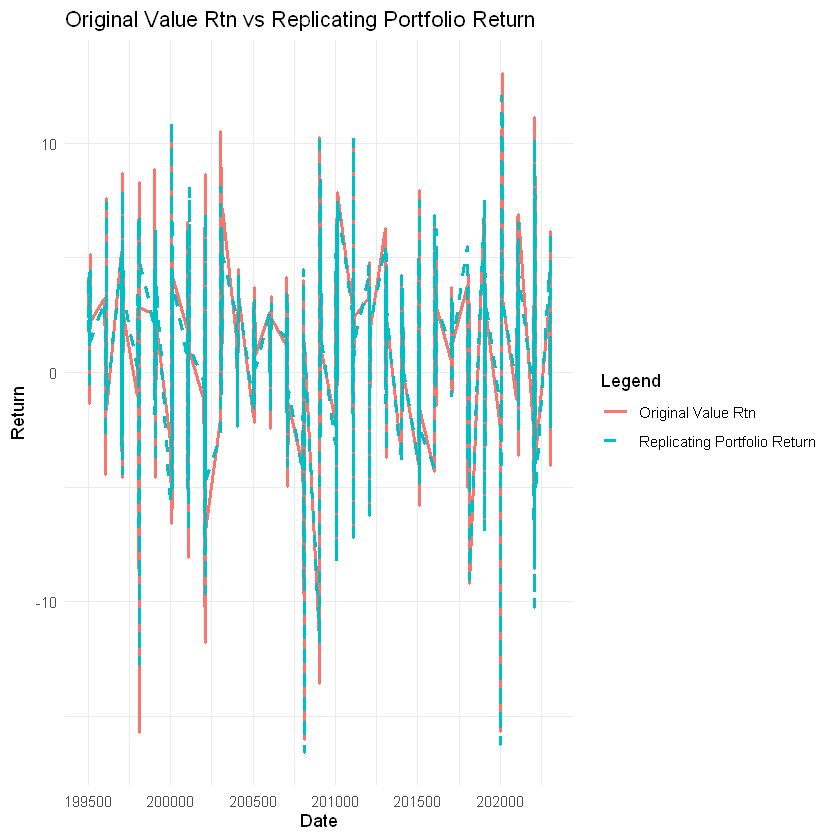

In [16]:
# Create a plot comparing the original and replicating portfolio returns
ggplot(datareg_df, aes(x = Date)) +
  geom_line(aes(y = `Value Rtn`, color = "Original Value Rtn"), size = 1) +
  geom_line(aes(y = Rep_Portfolio_Return, color = "Replicating Portfolio Return"), size = 1, 
            linetype = "dashed") +
  labs(title = "Original Value Rtn vs Replicating Portfolio Return",
       x = "Date",
       y = "Return",
       color = "Legend") +
  theme_minimal()
tail(datareg_df, 10)

In [17]:
#create annualized return
annual_return <- function(returns) {
  # Convert returns from percentage to decimal form
  returns <- returns / 100
  
  # Calculate the compounded return for the entire period
  compounded_return <- prod(1 + returns) - 1
  
  # Annualize the return using 12 divided by the number of months in the data
  annual_percentage <- (1 + compounded_return) ^ (12 / length(returns)) - 1
  
  # Convert to percentage form
  annual_percentage <- annual_percentage * 100
  return(annual_percentage)
}

# Apply the function to each return column in 'data' 
annual_results <- sapply(datareg_df[, c("Value Rtn", "Rep_Portfolio_Return","RF")], annual_return)

# Convert the results to a single-row DataFrame
annual_df <- as.data.frame(t(annual_results))

# Print the DataFrame
print(annual_df)

  Value Rtn Rep_Portfolio_Return       RF
1   9.04947             10.04588 2.183906


In [18]:
#annualized volatility
# Define the function to calculate annualized volatility for monthly returns
annual_volatility <- function(returns) {
  # Convert returns from percentage to decimal form 
  returns <- returns / 100
  
  # Calculate the standard deviation of monthly returns
  monthly_sd <- sd(returns)
  
  # Annualize the standard deviation by multiplying by sqrt(12)
  annual_sd <- monthly_sd * sqrt(12)
  
  # Convert back to percentage form
  annual_sd <- annual_sd * 100
  return(annual_sd)
}

# Apply the function to each return column in the data frame

annual_vol_results <- sapply(datareg_df[, c("Value Rtn", "Rep_Portfolio_Return")], 
                                 annual_volatility)

# Convert the results to a single-row DataFrame for easy viewing and for data anlysis
annual_vol_df <- as.data.frame(t(annual_vol_results))

# Print the DataFrame
print(annual_vol_df)

  Value Rtn Rep_Portfolio_Return
1   15.2667             14.86772


In [19]:
# Calculate Sharpe Ratio

# Define the Sharpe ratio function
sharperatio <- function(returns, rf, std) {
  excess_return <- returns - rf
  sharpee <- excess_return / std   # Calculate Sharpe Ratio
  return(sharpee)
}

# Calculate Sharpe ratios for each index and store them in a data frame
sharpe_ratio <- data.frame(
  Index = c("Replication", "Value Rtn"),
  Sharpe_Ratio = c(
    sharperatio(annual_df$Rep_Portfolio_Return, annual_df$RF, annual_vol_df$Rep_Portfolio_Return),
    sharperatio(annual_df$`Value Rtn`, annual_df$RF, annual_vol_df$`Value Rtn`)
  )
)

# Print the Sharpe ratios
print(sharpe_ratio)

        Index Sharpe_Ratio
1 Replication    0.5287952
2   Value Rtn    0.4497084


In [20]:
# Create a comparison dataframe
comparison_table <- data.frame(
  Metric = c("Annual Return", "Annual Volatility", "Sharpe Ratio"),
  `MSCI Value Index` = c(annual_df$`Value Rtn`, annual_vol_df$`Value Rtn`, sharpe_ratio$Sharpe_Ratio[2]),
  `Replicating Portfolio` = c(annual_df$Rep_Portfolio_Return, annual_vol_df$Rep_Portfolio_Return, sharpe_ratio$Sharpe_Ratio[1])
)

# Print the comparison table
print(comparison_table)

             Metric MSCI.Value.Index Replicating.Portfolio
1     Annual Return        9.0494701            10.0458839
2 Annual Volatility       15.2667028            14.8677168
3      Sharpe Ratio        0.4497084             0.5287952


In [21]:
#For 1.C
# Load necessary libraries
library(tidyverse)
library(readxl)
data <- read_excel("multi_factor_index_data.xlsx")

# Calculate Multi-Factor Index Return
data$MultiFactorIndex <- rowMeans(data[, c("value_return", "minimum_volatility", "equal_weighted", "momentum_indexes")])

print(data)

Warning message:
"package 'tidyverse' was built under R version 4.4.2"
Warning message:
"package 'tidyr' was built under R version 4.4.2"
Warning message:
"package 'readr' was built under R version 4.4.2"
Warning message:
"package 'forcats' was built under R version 4.4.2"
Warning message:
"package 'lubridate' was built under R version 4.4.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# A tibble: 343 × 8
     Date `usa-standard-return`    rf value_return minimum_volatility
    <dbl>                 <dbl> <dbl>        <dbl>              <dbl>
 1 199501                2.78    0.42        2.97               2.25 
 2 199502                3.97    0.4         4.15               3.63 
 3 199503                2.70    0.46        2.64               2.97 
 4 199504                3.16    0.44        3.45               2.71 
 5 199505                3.93    0.54        4.09               3.39 
 6 199506                2.48    0.47        1.59               1.38 
 7 199507                3.42    0.45        3.88               3.18 
 8 199508                0.0298  0.47        0.824              0.617
 9 199509                4.51    0.43        3.46               3.79 
10 199510               -0.0251  0.47       -1.36               0.145
# ℹ 333 more rows
# ℹ 3 more variables: equal_weighted <dbl>, momentum_indexes <dbl>,
#   MultiFactorIndex <dbl>


In [22]:
#Calculate Annualized Average Return
# Define the annualized_return function for monthly data
annualized_return <- function(returns) {
  # Convert returns from percentage to decimal form
  returns <- returns / 100
  
  # Calculate the compounded return for the entire period
  compounded_return <- prod(1 + returns) - 1
  
  # Annualize the return using 12 divided by the number of months in the data
  annualized_percentage <- (1 + compounded_return) ^ (12 / length(returns)) - 1
  
  # Convert to percentage form
  annualized_percentage <- annualized_percentage * 100
  return(annualized_percentage)
}

# Apply the function to each return column in data
annualized_results <- sapply(data[, c("usa-standard-return", "value_return", "minimum_volatility", 
                                      "equal_weighted", "momentum_indexes", "MultiFactorIndex","rf")], annualized_return)

# Convert the results to a single-row DataFrame
annualized_df <- as.data.frame(t(annualized_results))

# Print the DataFrame
print(annualized_df)

  usa-standard-return value_return minimum_volatility equal_weighted
1            10.48806      9.04947           10.12724       10.82238
  momentum_indexes MultiFactorIndex       rf
1         12.71683          10.8244 2.183906


In [23]:
# Define the function to calculate annualized volatility for monthly returns
annualized_volatility <- function(returns) {
  # Convert returns from percentage to decimal form 
  returns <- returns / 100
  
  # Calculate the standard deviation of monthly returns
  monthly_sd <- sd(returns)
  
  # Annualize the standard deviation by multiplying by sqrt(12)
  annualized_sd <- monthly_sd * sqrt(12)
  
  # Convert back to percentage form
  annualized_sd <- annualized_sd * 100
  return(annualized_sd)
}

#  Apply the function for annualized volatility

annualized_vol_results <- sapply(data[, c("usa-standard-return", "value_return", 
                                          "minimum_volatility", "equal_weighted", 
                                          "momentum_indexes", "MultiFactorIndex")], 
                                 annualized_volatility)

# Convert the results to a single-row DataFrame for later analysis
annualized_vol_df <- as.data.frame(t(annualized_vol_results))

# Print the DataFrame
print(annualized_vol_df)

  usa-standard-return value_return minimum_volatility equal_weighted
1            15.43684      15.2667           12.09228       17.13283
  momentum_indexes MultiFactorIndex
1         16.34088          14.4014


In [24]:
# Calculate Sharpe Ratio

sharpe_ratio <- function(returns, rf,std) {
  avg_excess_return <- returns - rf
  sharpe <- avg_excess_return / std   # Annualize the Sharpe Ratio
  return(sharpe)
}

# Calculate Sharpe ratios for each index and store them in a data frame
sharpe_ratios <- data.frame(
  Index = c("Value", "Min-Vol", "Equal-Weighted", "Momentum", "Multi-Factor Index", "USA Standard Return"),
  Sharpe_Ratio = c(
    sharpe_ratio(annualized_df$`usa-standard-return`, annualized_df$rf,annualized_vol_df$`usa-standard-return`),
    sharpe_ratio(annualized_df$value_return, annualized_df$rf,annualized_vol_df$value_return),
    sharpe_ratio(annualized_df$minimum_volatility, annualized_df$rf,annualized_vol_df$minimum_volatility),
    sharpe_ratio(annualized_df$equal_weighted, annualized_df$rf,annualized_vol_df$equal_weighted),
    sharpe_ratio(annualized_df$momentum_indexes, annualized_df$rf,annualized_vol_df$momentum_indexes),
    sharpe_ratio(annualized_df$MultiFactorIndex, annualized_df$rf,annualized_vol_df$MultiFactorIndex)
  )
)

# Print the Sharpe ratios
print(sharpe_ratios)

                Index Sharpe_Ratio
1               Value    0.5379436
2             Min-Vol    0.4497084
3      Equal-Weighted    0.6568929
4            Momentum    0.5042061
5  Multi-Factor Index    0.6445748
6 USA Standard Return    0.5999759


In [25]:
annualized_df <- data.frame(
  Index = c("USA Standard Return", "Value", "Min-Vol", "Equal-Weighted", "Momentum", "Multi-Factor Index", "RF"),
  Annualized_Return = c(
    annualized_df$`usa-standard-return`,
    annualized_df$value_return,
    annualized_df$minimum_volatility,
    annualized_df$equal_weighted,
    annualized_df$momentum_indexes,
    annualized_df$MultiFactorIndex,
    annualized_df$rf
  )
)

# Print the formatted data frame
print(annualized_df)
print(sharpe_ratios)

                Index Annualized_Return
1 USA Standard Return         10.488058
2               Value          9.049470
3             Min-Vol         10.127241
4      Equal-Weighted         10.822382
5            Momentum         12.716827
6  Multi-Factor Index         10.824400
7                  RF          2.183906
                Index Sharpe_Ratio
1               Value    0.5379436
2             Min-Vol    0.4497084
3      Equal-Weighted    0.6568929
4            Momentum    0.5042061
5  Multi-Factor Index    0.6445748
6 USA Standard Return    0.5999759


In [26]:
#5.E calculate active return for multi-factor index over MSCI USA standar index
#calculate active monthly return
active_monthly_return<-data$MultiFactorIndex-data$`usa-standard-return`
# Add active_monthly_return as a new column in the existing data frame
data$Active_Monthly_Return <- active_monthly_return

# Export the combined data frame to Excel
write_xlsx(data, "combined_data_1C&5E.xlsx")


# Calculate annualized active return, Extract the annualized values for MultiFactorIndex and USAStandardReturn from annualized_df
multi_factor_index_return <- annualized_df$Annualized_Return[annualized_df$Index == "Multi-Factor Index"]
usa_standard_return <- annualized_df$Annualized_Return[annualized_df$Index == "USA Standard Return"]
active_return <- multi_factor_index_return - usa_standard_return

# Create a tidy data frame with clear column names
active_return_df <- data.frame(
  Index = c("Multi-Factor Index", "USA Standard Return", "Active Return"),
  Value = c(multi_factor_index_return, usa_standard_return, active_return)
)

# Print the tidy data frame
print(active_return_df)

                Index     Value
1  Multi-Factor Index 10.824400
2 USA Standard Return 10.488058
3       Active Return  0.336342


In [27]:

# Calculate the tracking error (standard deviation of excess returns)
# Define the function to calculate annualized volatility for the active return (monthly return difference)
annualized_active_volatility <- function(data) {
  # Extract the relevant columns
  multi_factor_returns <- data$MultiFactorIndex / 100  # Convert to decimal form
  usa_standard_returns <- data$`usa-standard-return` / 100  # Convert to decimal form
  
  # Calculate the monthly active return (difference)
  active_returns <- multi_factor_returns - usa_standard_returns
  
  # Calculate the standard deviation of the monthly active return
  monthly_sd <- sd(active_returns)
  
  # Annualize the standard deviation by multiplying by sqrt(12)
  annualized_sd <- monthly_sd * sqrt(12)
  
  # Convert back to percentage form
  annualized_sd <- annualized_sd * 100
  return(annualized_sd)
}

# Call the function with the data frame `data`
annualized_active_sd <- annualized_active_volatility(data)

# Print the result
print(annualized_active_sd)

[1] 3.386704


In [28]:
# Calculate the information ratio
information_ratio <- active_return_df$Value[3] / annualized_active_sd


# Print the results
print(paste("Annualized Active Return:", round(active_return_df$Value[3], 4)))
print(paste("Annualized Tracking Error:", round(annualized_active_sd, 4)))
print(paste("Annualized Information Ratio:", round(information_ratio, 4)))

[1] "Annualized Active Return: 0.3363"
[1] "Annualized Tracking Error: 3.3867"
[1] "Annualized Information Ratio: 0.0993"
